# A Simple Neural Network from Scratch in Python

# 1. Linearly Separable Data Sets
- 앞선 학습11에서는 구분선이 class들을 잘 구분했지만 구분하기 어려운 경우들이 많음. 이번 학습에서는 이런 경우들 확인
- Linearly separable: 경계선이 선형 방정식으로 표현되는 경우 
$$\text{Linear equation : } \sum_{i=1}^nx_i\cdot w_i=0$$
- Linearly inseparable : 위의 경우가 아닌 경우 
  - simple neural network 사용 불가!! (simple neural network는 straight line decision boundary임) 

# 2. Perceptron for the AND Function
- input 2개가 모두 1인 경우에만 output이 1 <br>
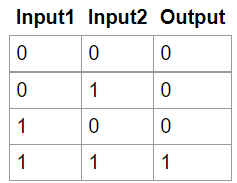

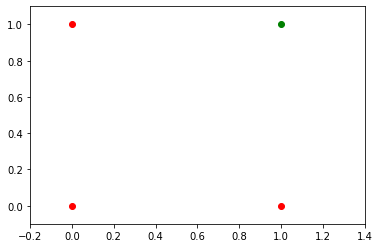

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
# 각 data point 그리기
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

plt.show()

- 기본 neural network 구현 
  - primitive neural network는 원점을 지나는 직선만 가능
  - 하지만 이 경우 경계선 역할을 할 수 없음.

[]

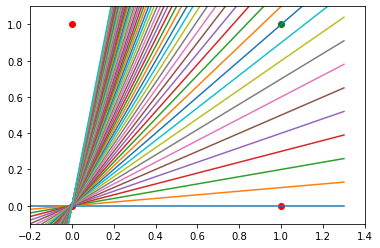

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# 원점을 지나는 기울기가 다른 직선들
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

- 아래와 같이 y절편이 0이 아닌 직선이 필요.
$$y=-x+1.2$$

[]

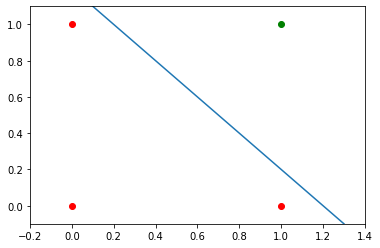

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
# 각 data point 그리기
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# 선형 경계선으로 구분 가능
m = -1
ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

## Single Perceptron with a Bias
- neural network 모델에서 살짝만 변형을 해서 y절편이 0이 아닌 직선을 만드려면? <br>
=> **bias node를 추가하면 됨!** <br>
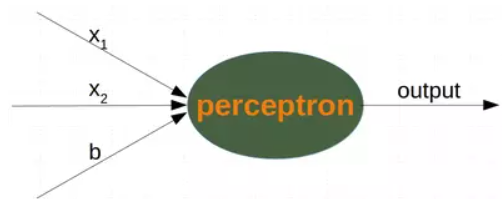

- bias node는 **상수**이고, 이 편향노드에 해당하는 가중치가 조정됨
- 편향을 포함하는 perceptron의 선형 방정식:
$$\sum_{i=1}^n w_i\cdot x_i + w_{n+1}\cdot b=0$$
  - 양변을 $w_2$로 나누면,
$$x_2=-\frac{w_1}{w_2}\cdot x_1 -\frac{w_3}{w_2}\cdot b$$
  - 즉, 기울기 $m=-\frac{w_1}{w_2}$, y절편 $c= -\frac{w_3}{w_2}\cdot b$

In [8]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x): # 계단 함수
        if  x <= 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self, 
               target_result, 
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  
        calculated_result = self(in_data)
        error = target_result - calculated_result
        # 오차가 있을 경우 조정:
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [16]:
# 예제 샘플 제너레이터 생성 (=> 제너레이터의 코드는 반복문으로 제너레이터를 돌 때 실행됨)
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,)) # 원소를 0 또는 1 무작위로 갖는 (2,) 열벡터 생성
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0) 

# 퍼셉트론 객체 생성 
p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.2)

# 예제 샘플들로 조정 과정 진행
for in_data, label in labelled_samples(30):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))

# 30개 샘플 중에서 몇개 맞췄는지 확인
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


기울기: -0.33333333333333326 y절편: 1.0000000000000002


[]

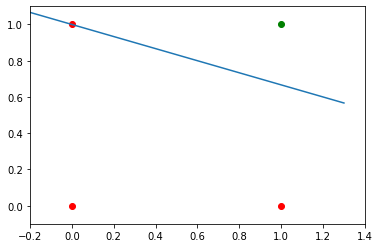

In [20]:
# 직전 코드의 perceptron 모델 결과 시각화
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# 직전 코드의 perceptron 객체의 가중치로 기울기, y절편 계산
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print('기울기:',m, 'y절편:', c)

# 경계선 그리기
ax.plot(X, m * X + c )
plt.plot()

## 여러개 군집 데이터로 확인

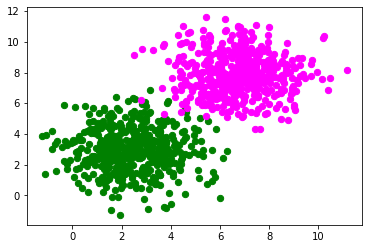

In [31]:
# 샘플 군집 여러개 생성
from sklearn.datasets import make_blobs

# 1000개 data point들을 center 중심의 2개 군집으로 생성
n_samples = 1000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             cluster_std=1.4,
                             random_state=0)

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
  # x값 = 각 라벨별 0열, y값 = 각 라벨별 1열
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))

In [33]:
from sklearn.model_selection import train_test_split
res = train_test_split(samples, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res 

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.8)

for sample, label in zip(train_data, train_labels):
    p.adjust(label,
             sample)

# 학습데이터 평가
evaluation = p.evaluate(train_data, train_labels)
print(evaluation)

Counter({'correct': 784, 'wrong': 16})


In [34]:
# 테스트데이터 평가
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 194, 'wrong': 6})


기울기: -1.4277135509226737 y절편: 10.516023065099064


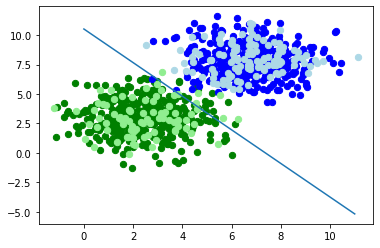

In [36]:
# 학습된 perceptron 모델 시각화
fig, ax = plt.subplots()

# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(train_data[train_labels==n_class][:, 0], 
               train_data[train_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0], 
               test_data[test_labels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
    
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print('기울기:',m, 'y절편:', c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

# 3. The XOR Problem for Neural Networks 
- XOR (exclusive or) 함수는 input 2개가 다른 값을 가질 때 1, 같을 경우 0
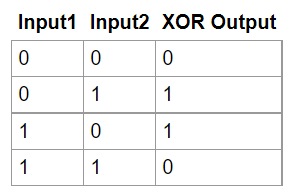

- XOR 문제는 직선 1개로는 절대 경계선을 그릴 수 없음 <br>
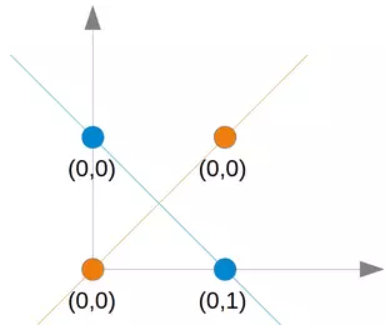
- 이 경우 2개 이상의 직선이 필요함 (또는 비선형 곡선이 필요하지만 여기서는 다루지 않음)
  - 은닉층을 포함한 neural network (nerual network with hidden layers) <br>
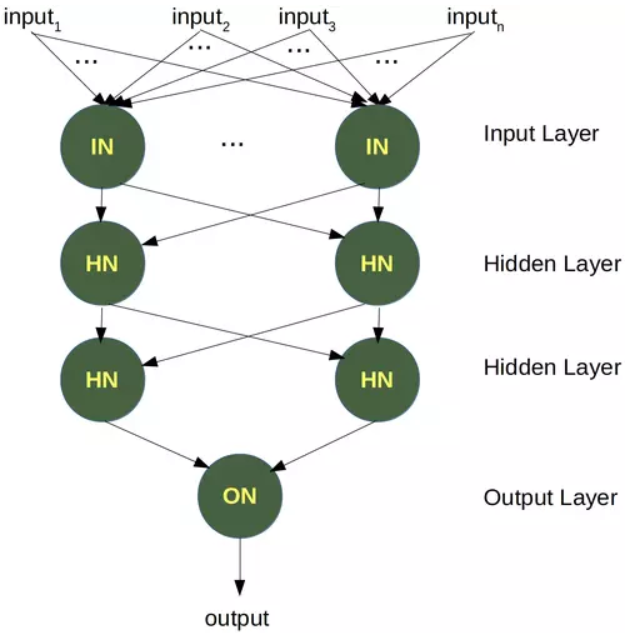

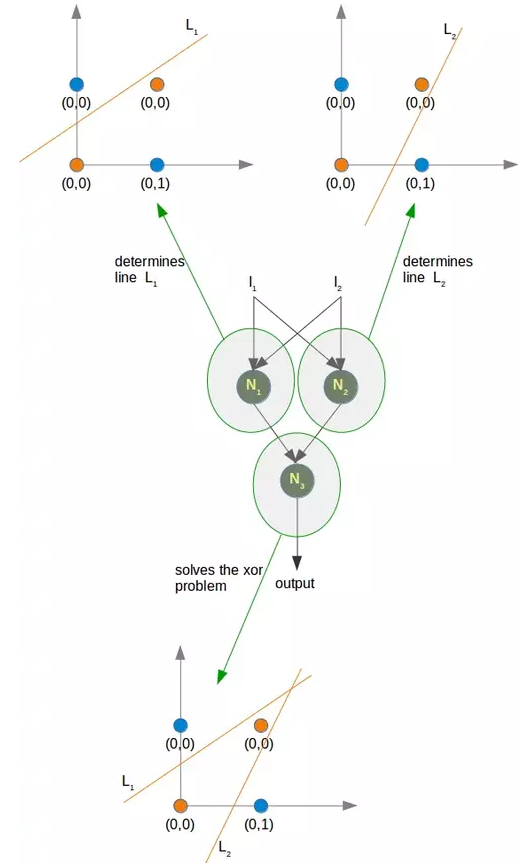